In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import fastai
from fastai.vision import *

from torchvision import models
from visualization.modules import LayeredModule, get_nested_layers
from visualization.data import *
from visualization.image_proc import *
from visualization.interpret import NetLens

In [2]:
path = Path("/Users/cfuentes/Documents/courses/fellowship-ai/vision-playground/data/faces_test/")
#verify_images(path, recurse=True)


In [4]:
def isFemale(path): return bool(int(path.name.split('_')[1]))

def get_gender(path):
   # print(path, "path here")
    return "female" if isFemale(path) else "male"


In [5]:
data = ( ImageList.from_folder(path) \
           # .filter_by_func() \
            .split_by_rand_pct(0.2) \
            .label_from_func(get_gender) \
            .transform(get_transforms()) \
            .databunch(num_workers=0) \
            .normalize(imagenet_stats) )

In [6]:
data

ImageDataBunch;

Train: LabelList (722 items)
x: ImageList
Image (3, 200, 200),Image (3, 200, 200),Image (3, 200, 200),Image (3, 200, 200),Image (3, 200, 200)
y: CategoryList
female,female,male,male,male
Path: /Users/cfuentes/Documents/courses/fellowship-ai/vision-playground/data/faces_test;

Valid: LabelList (180 items)
x: ImageList
Image (3, 200, 200),Image (3, 200, 200),Image (3, 200, 200),Image (3, 200, 200),Image (3, 200, 200)
y: CategoryList
male,female,female,male,male
Path: /Users/cfuentes/Documents/courses/fellowship-ai/vision-playground/data/faces_test;

Test: None

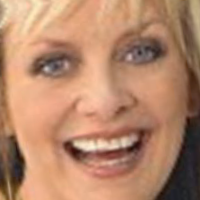

In [7]:
data.train_ds[22][0]

In [8]:
learner = cnn_learner(data, models.vgg19, metrics=[accuracy])

In [9]:
fastai.layers.AdaptiveConcatPool2d

fastai.layers.AdaptiveConcatPool2d

In [10]:
type(learner.model[1][0])

fastai.layers.AdaptiveConcatPool2d

In [11]:
data.train_ds.tfms

[RandTransform(tfm=TfmCrop (crop_pad), kwargs={'row_pct': (0, 1), 'col_pct': (0, 1), 'padding_mode': 'reflection'}, p=1.0, resolved={'row_pct': 0.27461579739762376, 'col_pct': 0.39329946318348186, 'padding_mode': 'reflection'}, do_run=True, is_random=True, use_on_y=True),
 RandTransform(tfm=TfmPixel (flip_lr), kwargs={}, p=0.5, resolved={}, do_run=True, is_random=True, use_on_y=True),
 RandTransform(tfm=TfmCoord (symmetric_warp), kwargs={'magnitude': (-0.2, 0.2)}, p=0.75, resolved={'magnitude': tensor([-0.0992,  0.1547,  0.1075, -0.0336]), 'invert': False}, do_run=False, is_random=True, use_on_y=True),
 RandTransform(tfm=TfmAffine (rotate), kwargs={'degrees': (-10.0, 10.0)}, p=0.75, resolved={'degrees': -7.758734871655664}, do_run=True, is_random=True, use_on_y=True),
 RandTransform(tfm=TfmAffine (zoom), kwargs={'scale': (1.0, 1.1), 'row_pct': (0, 1), 'col_pct': (0, 1)}, p=0.75, resolved={'scale': 1.0527441931816763, 'row_pct': 0.3986907160673101, 'col_pct': 0.7954038835560381}, do_run

In [12]:
learner.model

Sequential(
  (0): Sequential(
    (0): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace=True)
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (6): ReLU(inplace=True)
      (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (8): ReLU(inplace=True)
      (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): ReLU(inplace=True)
      (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (13): ReLU(inplace=True)
      (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (15): ReLU(inplace=True)
      (16): C

In [13]:
[t for t, _ in get_nested_layers(learner.model)]

['0-0-conv-0',
 '0-0-relu-0',
 '0-0-conv-1',
 '0-0-relu-1',
 '0-0-pool-0',
 '0-0-conv-2',
 '0-0-relu-2',
 '0-0-conv-3',
 '0-0-relu-3',
 '0-0-pool-1',
 '0-0-conv-4',
 '0-0-relu-4',
 '0-0-conv-5',
 '0-0-relu-5',
 '0-0-conv-6',
 '0-0-relu-6',
 '0-0-conv-7',
 '0-0-relu-7',
 '0-0-pool-2',
 '0-0-conv-8',
 '0-0-relu-8',
 '0-0-conv-9',
 '0-0-relu-9',
 '0-0-conv-10',
 '0-0-relu-10',
 '0-0-conv-11',
 '0-0-relu-11',
 '0-0-pool-3',
 '0-0-conv-12',
 '0-0-relu-12',
 '0-0-conv-13',
 '0-0-relu-13',
 '0-0-conv-14',
 '0-0-relu-14',
 '0-0-conv-15',
 '0-0-relu-15',
 '0-0-pool-4',
 '1-AdaptiveConcatPool2d-0',
 '1-Flatten-0',
 '1-BatchNorm1d-0',
 '1-dropout-0',
 '1-linear-0',
 '1-relu-0',
 '1-BatchNorm1d-1',
 '1-dropout-1',
 '1-linear-1']

In [14]:
learner.unfreeze()

In [15]:
a = LayeredModule(get_nested_layers(learner.model), hooked_layer_keys=["0-0-relu-15"])

In [16]:
women = learner.data.x[33].data
women.requires_grad_()
women = women.cuda()
women[None].shape


[('0.0.0.weight', True, device(type='cpu')),
 ('0.0.0.bias', True, device(type='cpu')),
 ('0.0.2.weight', True, device(type='cpu')),
 ('0.0.2.bias', True, device(type='cpu')),
 ('0.0.5.weight', True, device(type='cpu')),
 ('0.0.5.bias', True, device(type='cpu')),
 ('0.0.7.weight', True, device(type='cpu')),
 ('0.0.7.bias', True, device(type='cpu')),
 ('0.0.10.weight', True, device(type='cpu')),
 ('0.0.10.bias', True, device(type='cpu')),
 ('0.0.12.weight', True, device(type='cpu')),
 ('0.0.12.bias', True, device(type='cpu')),
 ('0.0.14.weight', True, device(type='cpu')),
 ('0.0.14.bias', True, device(type='cpu')),
 ('0.0.16.weight', True, device(type='cpu')),
 ('0.0.16.bias', True, device(type='cpu')),
 ('0.0.19.weight', True, device(type='cpu')),
 ('0.0.19.bias', True, device(type='cpu')),
 ('0.0.21.weight', True, device(type='cpu')),
 ('0.0.21.bias', True, device(type='cpu')),
 ('0.0.23.weight', True, device(type='cpu')),
 ('0.0.23.bias', True, device(type='cpu')),
 ('0.0.25.weight',

In [51]:
nl = NetLens(a, women[None], 0)

In [17]:
a

LayeredModule(
  (layers): ModuleDict(
    (0-0-conv-0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (0-0-relu-0): ReLU()
    (0-0-conv-1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (0-0-relu-1): ReLU()
    (0-0-pool-0): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (0-0-conv-2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (0-0-relu-2): ReLU()
    (0-0-conv-3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (0-0-relu-3): ReLU()
    (0-0-pool-1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (0-0-conv-4): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (0-0-relu-4): ReLU()
    (0-0-conv-5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (0-0-relu-5): ReLU()
    (0-0-conv-6): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (0-0-relu-6): ReLU()
    

In [26]:
women = learner.data.x[22].data
women.requires_grad_()
#women = women.cuda()
women = women[None]
women.shape


tensor([[0.3054, 0.3054, 0.3054,  ..., 1.0000, 1.0000, 1.0000],
        [0.3054, 0.3054, 0.3054,  ..., 1.0000, 1.0000, 1.0000],
        [0.3054, 0.3054, 0.3054,  ..., 1.0000, 1.0000, 1.0000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],
       device='cuda:0')

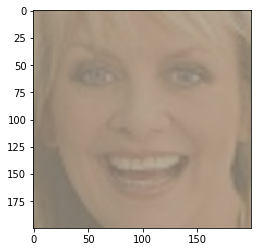

In [38]:
plt.imshow(recreate_image(women))

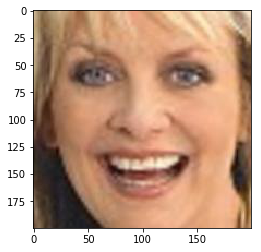

In [39]:
plt.imshow(recreate_image(women, denormalize=False))

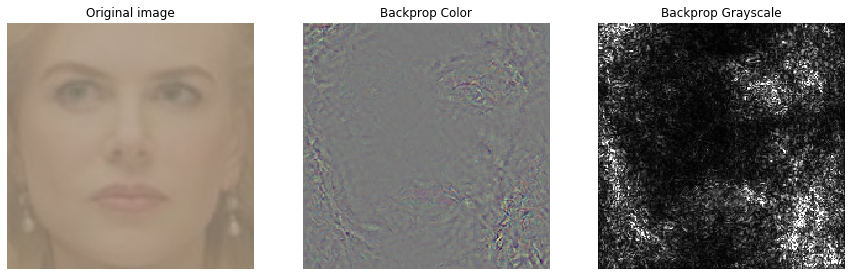

In [19]:
nl.show_smooth_gradient()

In [18]:
learner.freeze()

In [30]:
nl = NetLens(a, women, 0, denormalize=False)

In [31]:
learner.fit_one_cycle(2,1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,0.719412,0.529086,0.793862,01:01
1,0.542308,0.433787,0.812276,00:55


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


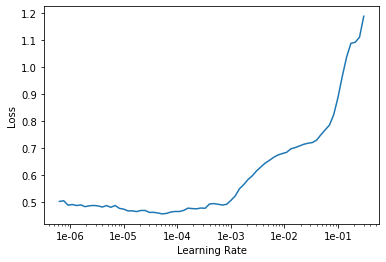

In [56]:
learner.lr_find()
learner.recorder.plot()

In [57]:
learner.fit_one_cycle(2,1e-4)

epoch,train_loss,valid_loss,accuracy,time
0,0.578217,1.372139,0.672634,02:23
1,0.530705,0.392654,0.820460,02:24


In [26]:
learner.unfreeze()
a = LayeredModule(get_nested_layers(learner.model))
nl = NetLens(a, women[None], 0)
nl.generate_cam("0-0-relu-15")

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [32]:
nl.input_image.shape

torch.Size([1, 3, 200, 200])

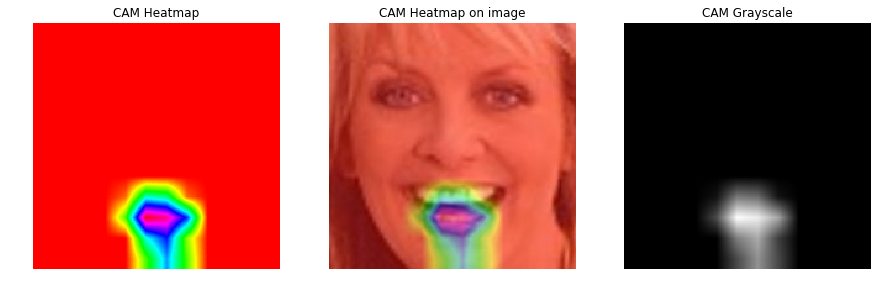

In [33]:
nl.show_guided_gradcam("0-0-relu-14")

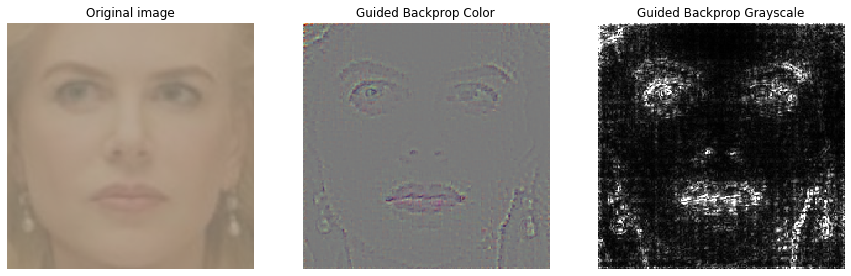

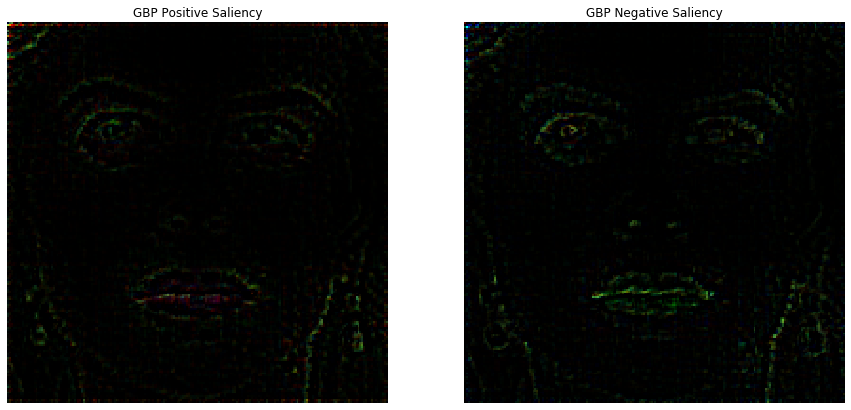

In [29]:
nl.show_gradient_backprop(guided=True)

In [25]:
learner.save('vgg_face_1')

In [ ]:
learner.lr_find()
learner.recorder.plot()

In [34]:
from fastai.utils.mem import * 
gpu_mem_get_all()
free = gpu_mem_get_free_no_cache()
free

[]

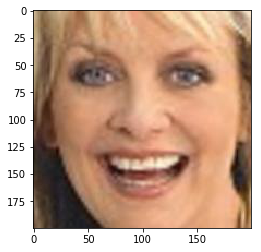

In [40]:
plt.imshow(nl.original_image())